<a href="https://colab.research.google.com/github/Saniya-Firdous/IIITH_AI-ML_Labs_and_Projects/blob/main/Training_a_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a Neural Network

Neural networks are a set of algorithms inspired by the functioning of the human brain. When you open your eyes, the information you perceive, known as data, is processed by neurons, which are the data processing cells in your brain. These neurons recognize patterns in the data and enable you to identify and understand your surroundings.

Here is an example of Neural Network trying to predict the image data that given to it(the image data is 28x28 pixels, thats 784 pixels at input neurons). it predicts that the no is 2 here:

![](https://miro.medium.com/v2/resize:fit:640/format:webp/0*aWIO7eB6E4-cIkK9.gif)

# Breaking Down The Neural Network!


### 1. Data
  The type of data a neural network processes varies drastically based on the problem being solved. When we build a neural network, we define what shape and kind of data it can accept. It may sometimes be neccessary to modify our dataset so that it can be passed to our neural network.

### 2. Layers
  As we mentioned earlier each neural network consists of multiple layers. At each layer a different transformation of data occurs. Our initial input data is fed through the layers and eventually arrives at the output layer where we will obtain the result.

  * Input Layer:
  The input layer is the layer that our initial data is passed to. It is the first layer in our neural network.

  * Output Layer:
  The output layer is the layer that we will retrive our results from. Once the data has passed through all other layers it will arrive here.

  * Hidden Layer(s):
  All the other layers in our neural network are called "hidden layers". This is because they are hidden to us, we cannot observe them. Most neural networks consist of at least one hidden layer but can have an unlimited amount. Typically, the more complex the model the more hidden layers.

![](https://miro.medium.com/v2/resize:fit:640/format:webp/0*BSxP3AHxBe_IevHC.png)

### 3. Neurons

Each layer is made up of what are called neurons. For example, say we want to pass an image that is 28x28 pixels, thats 784 pixels. We would need 784 neurons in our input layer to capture each of these pixels.

### 4. Weights
  Weights are associated with each connection in our neural network. Every pair of connected nodes will have one weight that denotes the strength of the connection between them. The model will try to determine what these weights should be to achieve the best result. Weights start out at a constant or random value and will change as the network sees training data.

### 5. Biases

  A bias is simply a constant value associated with each layer. It can be thought of as an extra neuron that has no connections. The purpose of a bias is to shift an entire activation function by a constant value. This allows a lot more flexibllity when it comes to choosing an activation and training the network. There is one bias for each layer.

![](https://miro.medium.com/v2/resize:fit:960/1*0lejoYyyQWjYzEP_BNW2nw.jpeg)

### 6. Activation Function

Activation functions are simply a function that is applied to the weighed sum of a neuron. They can be anything we want but are typically higher order/degree functions that aim to add a higher dimension to our data. We would want to do this to introduce more complexity to our model.


A list of some common activation functions and their graphs can be seen below:

* #### Sigmoid function:

  Transform $ (- \infty $ to $ \infty) $ into (0 to 1) range
  $$
  sigmoid(x) = \frac{1}{1 + e^{-x}}
  $$

* #### Tanh function:

  Similar to sigmoid, difference being that output is -1 to +1


$$
tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

  

* #### ReLU

  $$
  f(x) = \begin{cases} %
                      0 & if \; x<0 \\
                      x &  if \;x \geq 0.
                  \end{cases}
  $$

![](https://www.researchgate.net/publication/327435257/figure/fig4/AS:742898131812354@1554132125449/Activation-Functions-ReLU-Tanh-Sigmoid.ppm)

There are several other loss functions, each with its own specific use cases and characteristics, you can explore those at your own pace.

## Building a Nueral Network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import random

In [ ]:
# load the dataset

iris = load_iris()
data, labels = iris.data[:,0:2], iris.data[:,2]

num_samples = len(labels)  # size of our dataset

# shuffle the dataset
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]

In [ ]:
def weighted_sum(x, w, b):
    return b + np.dot(w, x)

# set our paramters - weights and bias
w = [0.5, -0.7]
b = 0.1

# for example, let's use the first data point
X, y = data, labels

pred_y = [weighted_sum(x, w, b) for x in X]

# let's print out the first prediction
print("for x=[%0.2f, %0.2f], predicted = %0.2f, actual = %0.2f" % (X[0][0], X[0][1], pred_y[0], y[0]))

for x=[7.30, 2.90], predicted = 1.72, actual = 6.30


In [ ]:
# sum squared error
def cost_function(y_pred, y_actual):
    return 0.5 * np.sum((y_actual-y_pred)**2)

error = cost_function(pred_y, y)
print(error)

745.3167499999998


In [ ]:
# normalizing the data
X = X / np.amax(X, axis=0)
y = y / np.amax(y, axis=0)

# randomly initializing w, b
w, b = [random.random(), random.random()], random.random()

# our function w*x + b
def F(X, w, b):
    return np.sum(w*X, axis=1) + b

# calculating error using cost function(Here we use Mean Squared Error)
y_pred = F(X, w, b)
init_cost = cost_function(y_pred, y)

print("initial parameters: w1=%0.3f, w2=%0.3f, b=%0.3f"%(w[0], w[1], b))
print("initial cost = %0.3f" % init_cost)

initial parameters: w1=0.435, w2=0.250, b=0.543
initial cost = 22.277


In [ ]:
# sum squared error
def cost_function(y_pred, y_actual):
    return 0.5 * np.sum((y_actual-y_pred)**2)

error = cost_function(pred_y, y)
print(error)

16.565938195757205


In [ ]:
# normalizing the data
X = X / np.amax(X, axis=0)
y = y / np.amax(y, axis=0)

# randomly initializing w, b
w, b = [random.random(), random.random()], random.random()

# our function w*x + b
def F(X, w, b):
    return np.sum(w*X, axis=1) + b

# calculating error using cost function(Here we use Mean Squared Error)
y_pred = F(X, w, b)
init_cost = cost_function(y_pred, y)

print("initial parameters: w1=%0.3f, w2=%0.3f, b=%0.3f"%(w[0], w[1], b))
print("initial cost = %0.3f" % init_cost)

initial parameters: w1=0.757, w2=0.211, b=0.739
initial cost = 63.872


In [ ]:
# implement partial derivatives of our parameters

def dJdw1(X, y, w, b):
    return -np.dot(X[:,0], y - F(X, w, b))

def dJdw2(X, y, w, b):
    return -np.dot(X[:,1], y - F(X, w, b))

def dJdb(X, y, w, b):
    return -np.sum(y - F(X, w, b))

In [ ]:
# choose the learning rate parameter and number of iterations
lr = 0.001
n_iters = 2000

# run through gradient descent
errors = []
for i in range(n_iters):
    w[0] = w[0] - lr * dJdw1(X, y, w, b)
    w[1] = w[1] - lr * dJdw2(X, y, w, b)
    b = b - lr * dJdb(X, y, w, b)
    y_pred = F(X, w, b)
    j = cost_function(y_pred, y)
    errors.append(j)

Text(0.5, 0, 'iterations')

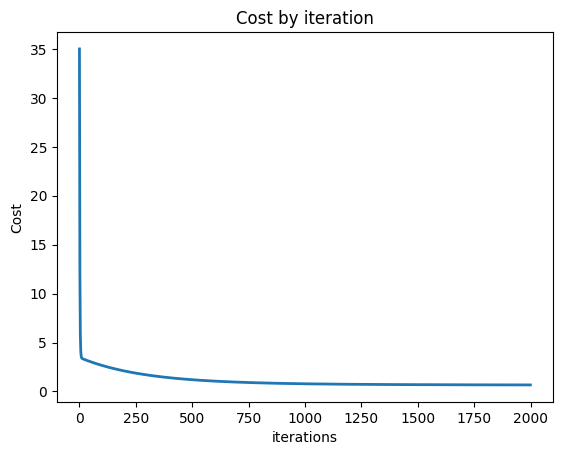

In [ ]:
# plot the error
plt.plot(range(n_iters), errors, linewidth=2)
plt.title("Cost by iteration")
plt.ylabel("Cost")
plt.xlabel("iterations")

# Implementing Sigmoid Function

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def weighted_sum(x, w, b):
    return b + np.dot(w, x)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# our parameters
w = [0.3, 0.4]
b = -0.2

X, y = data, labels

# get weighted sum like before
Z = [weighted_sum(x, w, b) for x in X]

# now transform the weighted sums with a sigmoid
y_pred = [sigmoid(z) for z in Z]

# evaluate error
error = cost_function(y_pred, y)
print(error)

826.025685090736


# Adding a hidden layer

In [ ]:
W1 = np.random.randn(2, 4)  # Adjust the size of the hidden layer
W2 = np.random.randn(4, 1)   # Adjust the size of the output layer

print("W1=", W1)
print("W2=", W2)

W1= [[-0.0958505   1.76786486  0.7504901   0.68116472]
 [ 1.37644775 -1.43186464  1.36590545  0.12906162]]
W2= [[ 0.91506719]
 [-0.07532707]
 [-1.13673753]
 [ 1.23250518]]


In [ ]:
X, y = data, labels

# first layer weighted sum z
z = np.dot(X, W1)

# project z through non-linear sigmoid
z = sigmoid(z)

# do another dot product at end (sigmoid is omitted)
y_pred = np.dot(z, W2)

# what is our cost
error = cost_function(y_pred, y)

print('predicted %0.2f for example 0, actual %0.2f, total cost %0.2f'%(pred_y[0], y[0], error))

predicted 1.72 for example 0, actual 6.30, total cost 127261.44


In [ ]:
class Neural_Network(object):
    def __init__(self, n0, n1, n2):
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2

        # initialize weights
        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)

    def predict(self, x):
        z = np.dot(x, self.W1)
        z = sigmoid(z)
        y = np.dot(z, self.W2)
        return y


In [ ]:
# Instantiate a neural network with 2 input neurons, 4 hidden neurons, and 1 output neuron using the class

net = Neural_Network(2, 4, 1)

# Performing Forward Pass

In [ ]:
X, y = data, labels
y_pred = net.predict(X)
error = cost_function(y_pred, y)

print('predicted %0.2f for example 0, actual %0.2f, total cost %0.2f'%(pred_y[0], y[0], error))

predicted 1.72 for example 0, actual 6.30, total cost 245954.25


In [ ]:
def get_gradient(net, X, y):
    w_delta = 1e-8

    # get the current value of the loss, wherever the parameters are
    y_pred_current = net.predict(X)
    error_current = cost_function(y_pred_current, y)

    # grab the current weights and copy them (so we can restore them after modification)
    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2)

    # Calculate gradient for the first layer
    for i in range(net.n0):
        for j in range(net.n1):
            net.W1 = np.copy(W1)
            net.W1[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw1[i][j] = (error - error_current) / w_delta

    # Calculate gradient for the second layer
    for i in range(net.n1):
        for j in range(net.n2):
            net.W2 = np.copy(W2)
            net.W2[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw2[i][j] = (error - error_current) / w_delta

    # restore the original weights
    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2

In [ ]:
# load the data and labels
X, y = data, labels.reshape((len(labels),1))

# it's always a good idea to normalize the data between 0 and 1
X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)

# create a 2x3x1 neural net
net = Neural_Network(2, 3, 1)

# what is the current cost?
y_orig = net.predict(X)
init_cost = cost_function(y_orig, y)
print("initial cost = %0.3f" % init_cost)

# Set the learning rate, and how many epochs (updates) to try
n_epochs = 2000
learning_rate = 0.01

# for each epoch, calculate the gradient, then subtract it from the parameters, and save the cost
errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = cost_function(y_pred, y)
    errors.append(error)


initial cost = 9.644


Text(0, 0.5, 'Error')

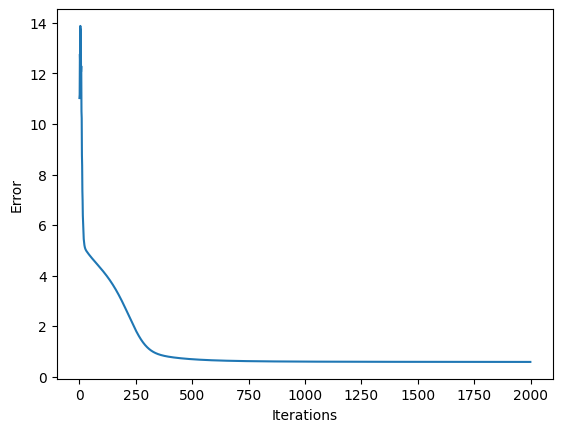

In [ ]:
# plotting iterations vs error
plt.plot(range(0, len(errors)), errors)
plt.xlabel('Iterations')
plt.ylabel('Error')